In [1]:
import healpy as hp
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from glob import glob
from matplotlib import pyplot as plt

In [4]:
hitmap = hp.ma(hp.read_map("../data/hitmaps/hitmap_Greenland_20_opening.fits"))

NSIDE = 128
ORDERING = RING in fits file


In [5]:
sampling_frequency = 30

In [6]:
pixarea_sqdeg = hp.nside2pixarea(128, degrees=True)

In [7]:
sensitivity = 32

In [8]:
sensitivity_map = sensitivity / np.sqrt(hitmap / sampling_frequency) 

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [9]:
sensitivity_map_sqdeg = sensitivity_map * np.sqrt(pixarea_sqdeg) 

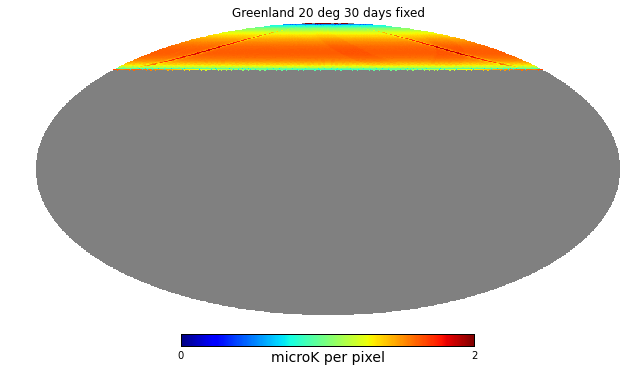

In [10]:
s = hp.mollview(sensitivity_map_sqdeg, xsize=1000,min=0, max=2, unit="microK per pixel", title="Greenland 20 deg 30 days fixed", return_projected_map=True)

In [11]:
cmap = plt.get_cmap("gray")

In [12]:
cmap.set_under("white")

In [13]:
xsize = 1000
ysize = xsize/2

In [14]:
I = hp.read_map('../data/plank/30GHz_intensity_smooth_1deg.fits')
Q = hp.read_map('../data/plank/30GHz_Q_smooth_1deg.fits')
U = hp.read_map('../data/plank/30GHz_U_smooth_1deg.fits')
hits30 = hp.read_map('../data/plank/LFI_SkyMap_030_1024_R2.00_full.fits', 3)
p = np.sqrt(Q**2 + U**2)


NSIDE = 1024
ORDERING = RING in fits file
NSIDE = 1024
ORDERING = RING in fits file
NSIDE = 1024
ORDERING = RING in fits file
NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


In [15]:
#set infinities to empty in array
s[np.isinf(s)]=None

NameError: name 'cmb' is not defined

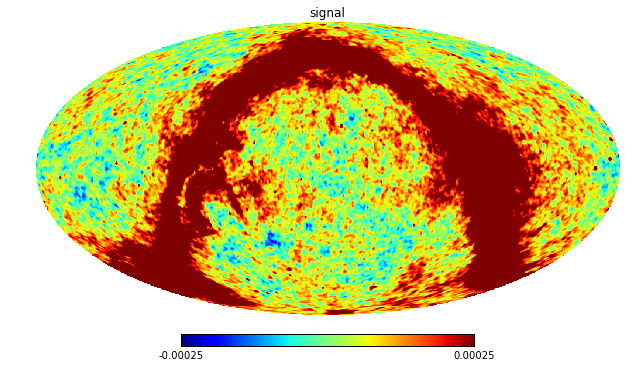

In [16]:
I30 = hp.mollview(I, min=-1e-3 / 4, max=1e-3 / 4, coord = ["G", "E"], notext = 'True', return_projected_map=True, xsize=xsize, title = "signal")
cmb30 = hp.mollview(cmb, min=-1e-3 / 4, max=1e-3 / 4, coord = ["G", "E"], notext = 'True', return_projected_map=True, xsize=xsize, title = "cmb")
P30 = hp.mollview(p, min=-1e-3, max=1e-3, coord = ["G", "E"], notext = 'True', return_projected_map=True, xsize=xsize)

In [18]:
pi = np.pi

In [19]:
#mask empty elements
s.mask |= np.isnan(s)

In [20]:
#set empty elements to 0
s.fill_value=0

In [21]:
s.filled().max()

40.142792613437351

In [22]:
%load_ext autoreload

In [23]:
%autoreload 2 #see what happens if you dont use this

In [24]:
# sets infinite elements to zero?
I30[np.isinf(I30)]=np.nan

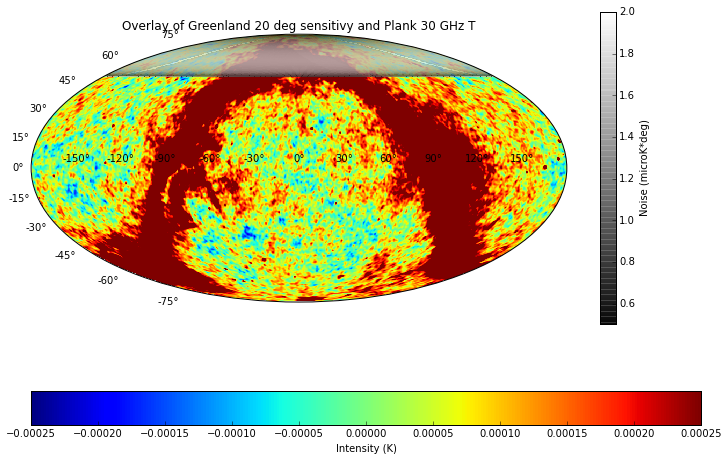

In [25]:
#longitude = np.radians(np.linspace(-180, 180, xsize))
#latitude = np.radians(np.linspace(-90, 90, ysize))
fig = plt.figure(figsize=(12, 12/(3./2.)))
# matplotlib is doing the mollveide projection
ax = fig.add_subplot(111,projection='mollweide')

#image = plt.pcolormesh(longitude[::-1], latitude, s, vmin=3.7, vmax=20, rasterized=True)

#image = plt.pcolormesh(longitude[::-1], latitude, p30proj, vmin=-1e-3, vmax=1e-3, rasterized=True, cmap=cmap, alpha=.3)
image = plt.imshow(I30, vmin= -1e-3 / 4, vmax= 1e-3 / 4, aspect=0.5, interpolation="nearest",origin="lower", extent=(-pi,pi,-pi/2,pi/2))
cb1 = plt.colorbar(orientation = 'horizontal')
cb1.set_label('Intensity (K)')
image = plt.imshow(s, vmin=0.5, vmax=2, alpha = 0.8, cmap = cmap, aspect=0.5, interpolation="nearest", origin="lower", extent=(-pi,pi,-pi/2,pi/2))
cb2 = plt.colorbar()
cb2.set_label('Noise (microK*deg)')

plt.title("Overlay of Greenland 20 deg sensitivy and Plank 30 GHz T")

#plt.savefig('../data/sensitivity/30GHz_30days/overlayed_maps/sensitivity_20deg_vs_foreground_over_signal.png')